### Trees
1. Needs a lot of data
2. It is a non-parametric method

### Control over fitting, when to stop growing the tree
1. in Python, you can use min_samples_leaf

- Out of sample prediction
- care more about causility

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('~/Downloads/Stevens.csv')

In [3]:
df.head()

,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
1,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
4,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1


In [11]:
# X is independent variables
X = df.drop(['Docket', 'Term', 'Reverse'], axis=1)
y = df['Reverse']

In [15]:
# Convert categorical variables to dummy variables, like one-hot encoding
"""
The get_dummies() function in the Pandas library is a powerful tool for handling categorical data in machine learning and data analysis.
It is used to convert categorical variables into a binary/indicator format, often referred to as "one-hot encoding."
This transformation is essential because many machine learning algorithms require numerical data as input, while categorical data is typically non-numeric.
"""
X = pd.get_dummies(X)

In [16]:
X.head()

,Unconst,Circuit_10th,Circuit_11th,Circuit_1st,Circuit_2nd,Circuit_3rd,Circuit_4th,Circuit_5th,Circuit_6th,Circuit_7th,...,Respondent_EMPLOYEE,Respondent_EMPLOYER,Respondent_GOVERNMENT.OFFICIAL,Respondent_INJURED.PERSON,Respondent_OTHER,Respondent_POLITICIAN,Respondent_STATE,Respondent_US,LowerCourt_conser,LowerCourt_liberal
0,0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
dt = DecisionTreeClassifier(min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

[Text(0.5, 0.75, 'LowerCourt_liberal <= 0.5\ngini = 0.494\nsamples = 452\nvalue = [202, 250]\nclass = Yes'),
 Text(0.25, 0.25, 'gini = 0.403\nsamples = 232\nvalue = [65, 167]\nclass = Yes'),
 Text(0.75, 0.25, 'gini = 0.47\nsamples = 220\nvalue = [137, 83]\nclass = No')]

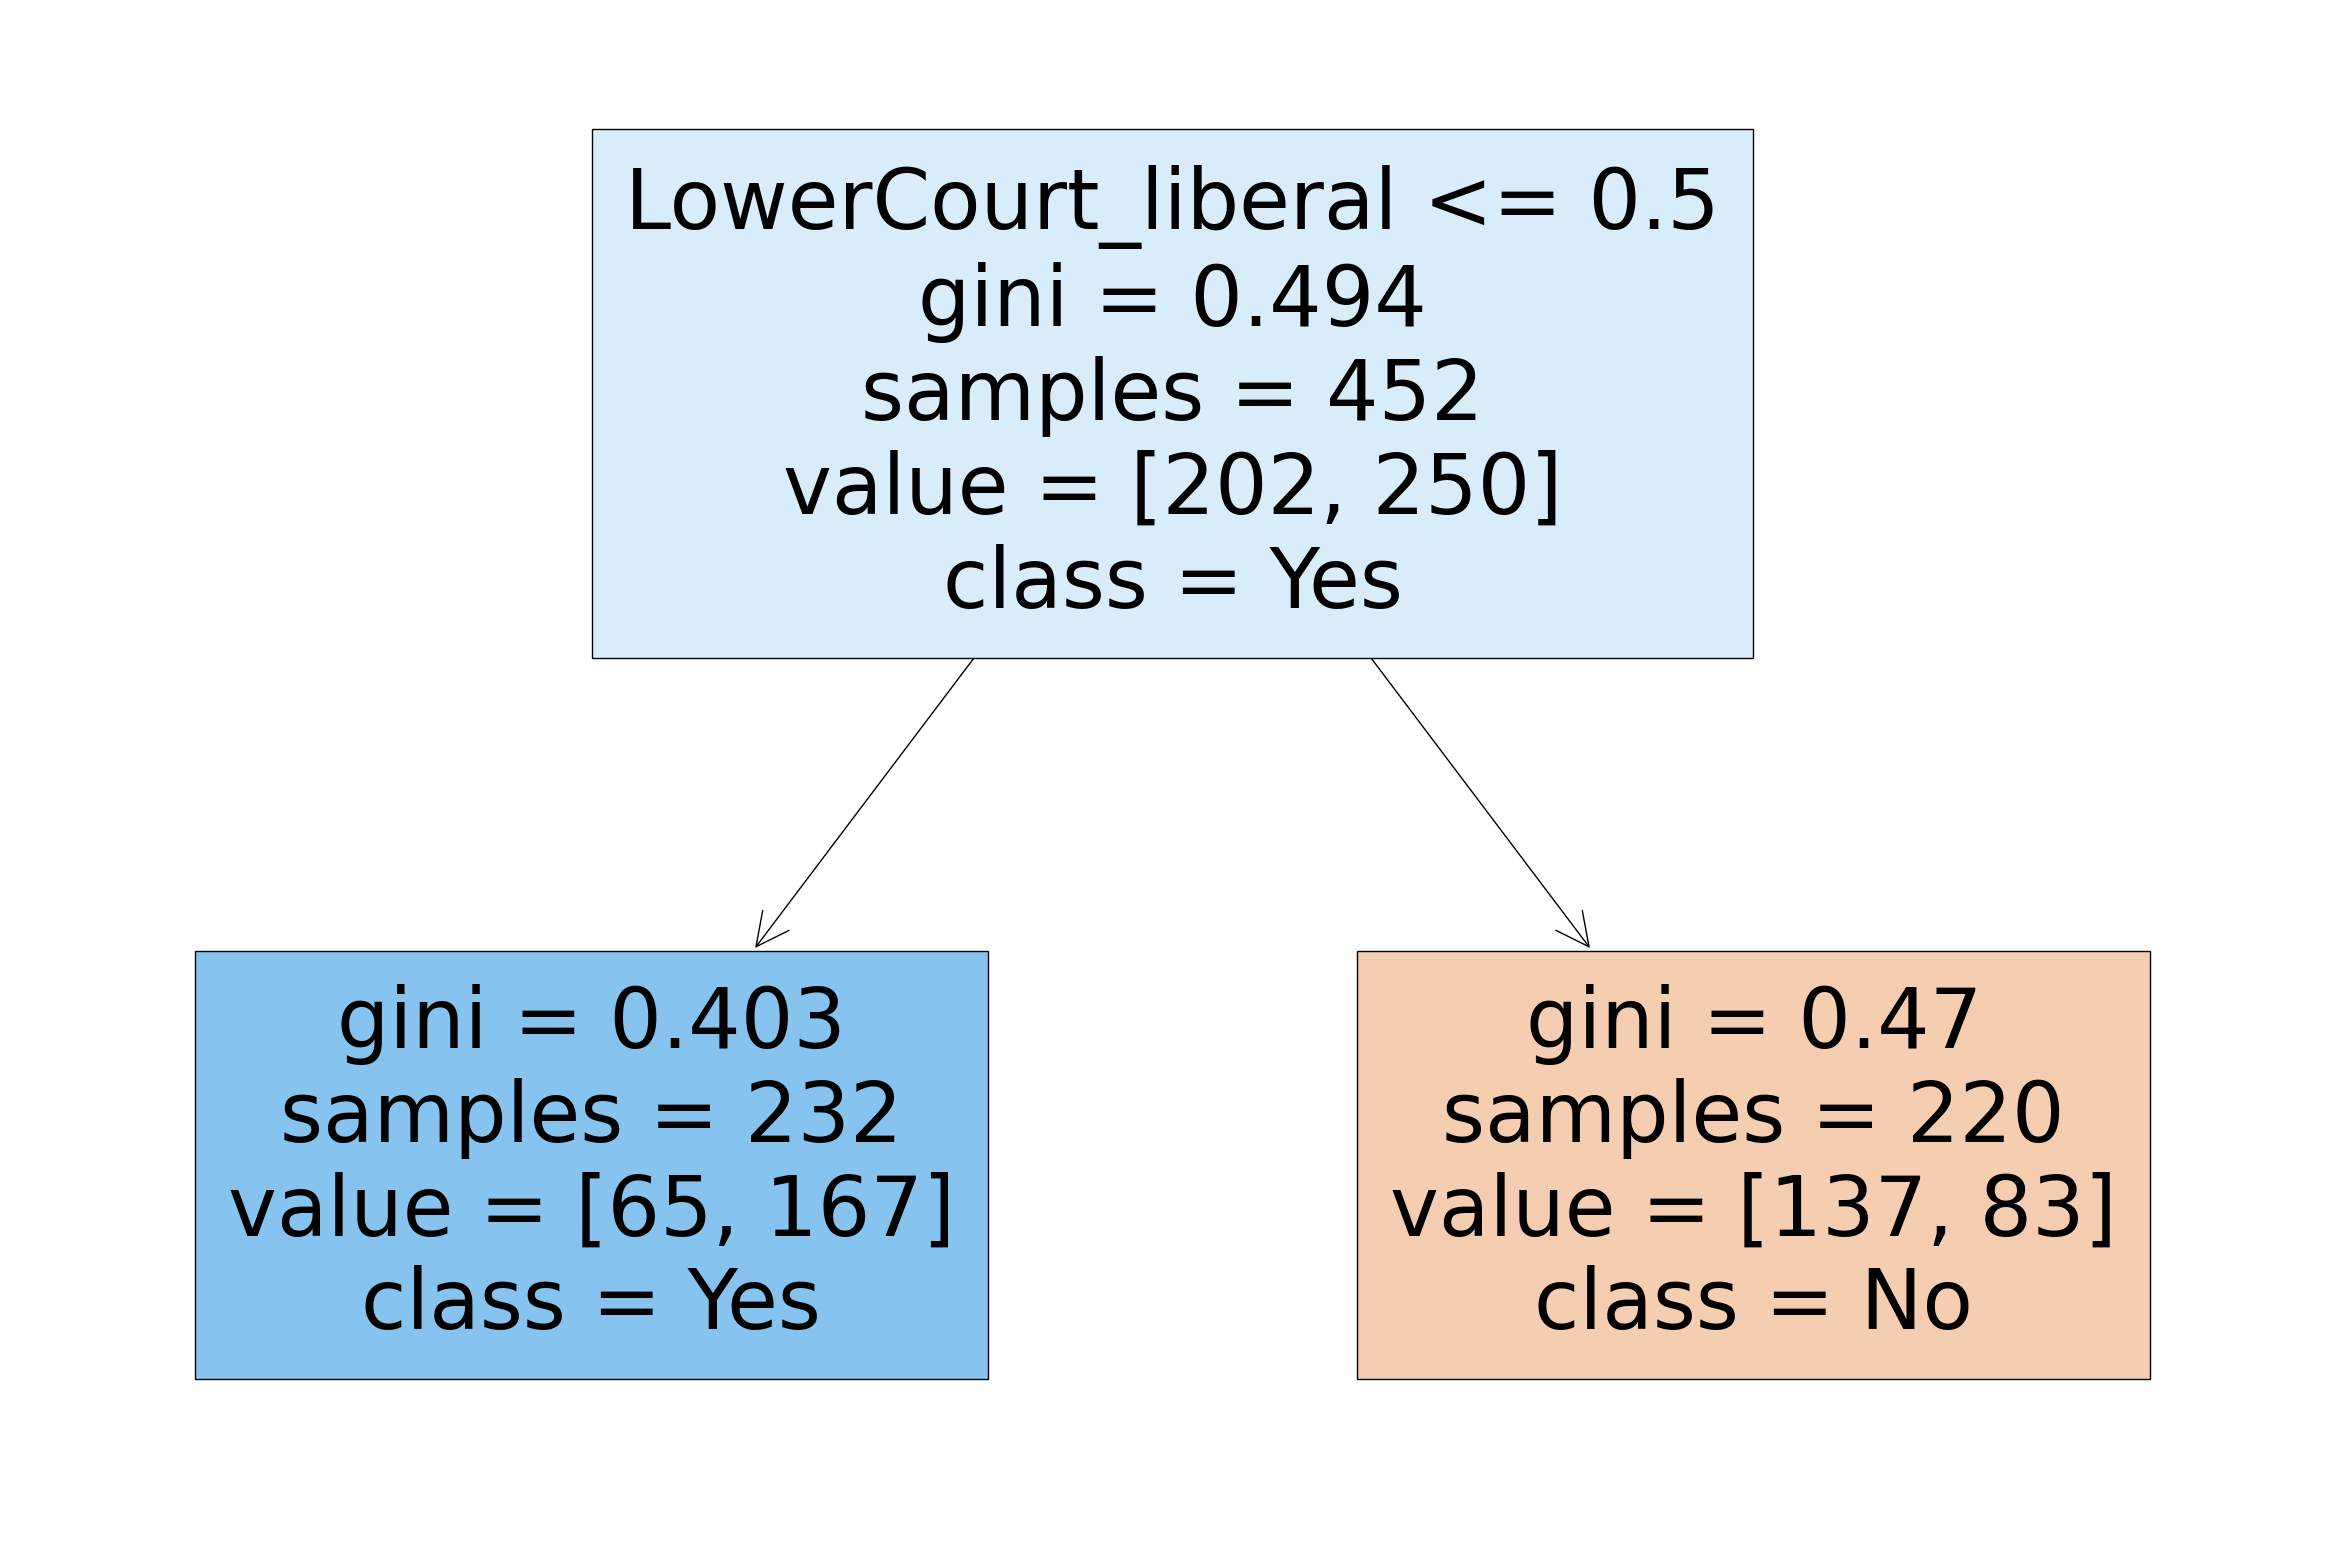

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plot_tree(dt, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)

The output of `plot_tree` is a visual representation of a decision tree model. The plot shows the structure of the tree, including the decision rules at each node and the class labels for the leaf nodes.

The output consists of three parts, each enclosed in a set of parentheses. The first part `(Text(0.5, 0.75, 'LowerCourt_liberal <= 0.5\ngini = 0.494\nsamples = 452\nvalue = [202, 250]\nclass = Yes')` represents the root node of the tree. The root node is the starting point of the tree, and it represents the entire dataset. The decision rule at the root node is `LowerCourt_liberal <= 0.5`, which means that if the value of the `LowerCourt_liberal` feature is less than or equal to 0.5, the model follows the left branch of the tree. Otherwise, it follows the right branch. The `gini` value of 0.494 represents the impurity of the node, which is a measure of how mixed the class labels are. The `samples` value of 452 represents the number of samples in the node, and the `value` array of `[202, 250]` represents the number of samples in each class. The `class` value of `Yes` indicates that the majority class in the node is `Yes`.

The second part `(Text(0.25, 0.25, 'gini = 0.403\nsamples = 232\nvalue = [65, 167]\nclass = Yes')` represents the left child node of the root node. This node represents the subset of the dataset where the `LowerCourt_liberal` feature is less than or equal to 0.5. The `gini` value of 0.403 represents the impurity of the node, which is lower than the impurity of the root node. The `samples` value of 232 represents the number of samples in the node, and the `value` array of `[65, 167]` represents the number of samples in each class. The `class` value of `Yes` indicates that the majority class in the node is `Yes`.

The third part `(Text(0.75, 0.25, 'gini = 0.47\nsamples = 220\nvalue = [137, 83]\nclass = No')` represents the right child node of the root node. This node represents the subset of the dataset where the `LowerCourt_liberal` feature is greater than 0.5. The `gini` value of 0.47 represents the impurity of the node, which is also lower than the impurity of the root node. The `samples` value of 220 represents the number of samples in the node, and the `value` array of `[137, 83]` represents the number of samples in each class. The `class` value of `No` indicates that the majority class in the node is `No`.

Overall, the output of `plot_tree` provides a concise and informative summary of the decision tree model, including the decision rules, the impurity of each node, and the class labels for each leaf node.

### Finding the best min_samples_leaf
- min_samples_leaf is a hyperparameter
- The best value for min_samples_leaf is the one that results in the lowest cross-validation error.